In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
excelsheet = pd.ExcelFile('/anvil/projects/x-cis220051/corporate/molecular-stethoscope/Teams/Team-2/ClusterMarkers_1819ADcohort-Copy1.congregated_DR.xlsx')
TPMs = excelsheet.parse(excelsheet.sheet_names[-1])
TPMs = TPMs[~TPMs.Coeff.isna()]
df = pd.read_csv('AD-data.csv',index_col =0)
df = df.iloc[TPMs.gene_id.index.tolist(),:-6].T
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,957,958,959,960,961,962,963,964,965,966
11174-r1-AD,40.167869,4.669515,91.808686,44.561230,3.803395,66.791635,5.799236,3.288744,127.733824,44.774622,...,51.490187,1.217589,0.000000,22.983553,3.966577,11.975046,79.808535,586.689385,2.435177,30.615448
11178-r1-AD,43.221009,8.401576,52.448546,8.633877,2.503695,41.581992,6.594785,19.603677,87.151829,21.784731,...,27.656800,22.120278,4.710561,19.681111,5.691390,15.099606,90.055599,1025.663329,8.659689,61.572838
11182-r1-AD,102.123100,6.827512,105.386495,19.836541,10.826006,40.062907,8.264297,4.945213,50.699569,2.506020,...,23.422934,10.124321,0.668272,13.732990,0.935581,19.157131,150.695337,858.495631,17.196866,113.283243
11182-r2-AD,82.137419,9.261443,48.958301,21.810697,3.646693,66.856038,5.070640,5.765248,30.261764,0.000000,...,20.236252,6.610355,4.908565,5.730518,1.238718,12.294565,83.364560,699.377835,19.587951,82.241610
11186-r1-AD,59.941767,11.148535,32.223227,9.518698,7.922817,17.588653,24.402275,6.824941,89.969242,18.856304,...,50.468342,15.234445,6.010022,0.000000,1.358197,11.918180,101.977969,917.722489,7.786997,66.336612


In [3]:
excelsheet = pd.ExcelFile('/anvil/projects/x-cis220051/corporate/molecular-stethoscope/Teams/Team-2/ClusterMarkers_1819ADcohort-Copy1.congregated_DR.xlsx')
TPMs = excelsheet.parse(excelsheet.sheet_names[-1])
TPMs = TPMs[~TPMs.Coeff.isna()]
df1 = pd.read_csv('NCI-data.csv',index_col =0)
df1 = df1.iloc[TPMs.gene_id.index.tolist(),:-6].T
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,957,958,959,960,961,962,963,964,965,966
17921-r1-NCI,30.269536,12.039150,52.116245,6.122572,1.167294,20.381869,4.280078,10.208101,69.659987,10.322541,...,76.377650,27.511518,4.131305,12.794458,1.029965,18.836921,81.607584,1476.501044,12.222255,46.497212
17922-r1-NCI,14.224502,8.799692,59.422922,15.299465,2.424915,14.636988,5.162319,5.849795,36.386227,0.000000,...,67.760130,10.937117,2.037429,17.399391,2.912398,8.549701,72.634960,1256.668548,5.899794,80.709677
17923-r1-NCI,7.123632,15.465508,39.056087,9.818223,2.013200,11.552673,8.238635,8.187015,63.100926,4.552930,...,74.333552,27.410497,1.455699,16.343057,4.336124,13.710411,115.939692,1419.254632,28.824899,60.912216
17924-r1-NCI,14.382305,12.250762,28.192460,14.741302,4.139681,13.114598,4.173337,12.475135,87.157668,2.804662,...,55.487428,24.781991,4.162118,15.571482,3.197314,17.119655,133.602867,1465.200167,12.419042,59.986105
17925-r1-NCI,34.784636,10.080862,51.095243,15.664979,3.330082,17.567883,1.042067,8.211938,47.187493,1.936885,...,32.326718,8.155304,4.077652,11.360791,3.624579,18.995062,78.494798,1361.006922,14.498318,124.436343


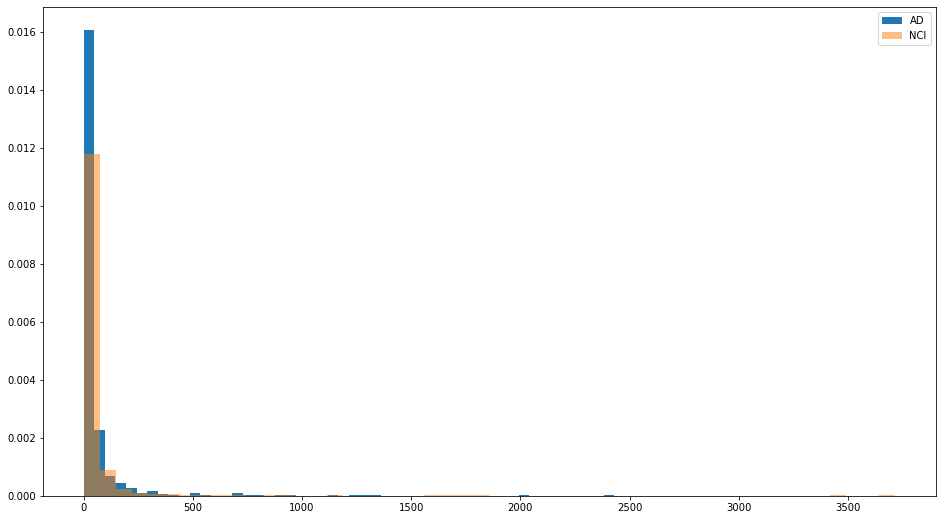

In [12]:
fig,ax = plt.subplots(figsize = (16,9))
plt.hist(df.mean(),bins = 50,density = True,label='AD')
plt.hist(df1.mean(),bins = 50,density = True,alpha = .5,label = 'NCI')
plt.legend()

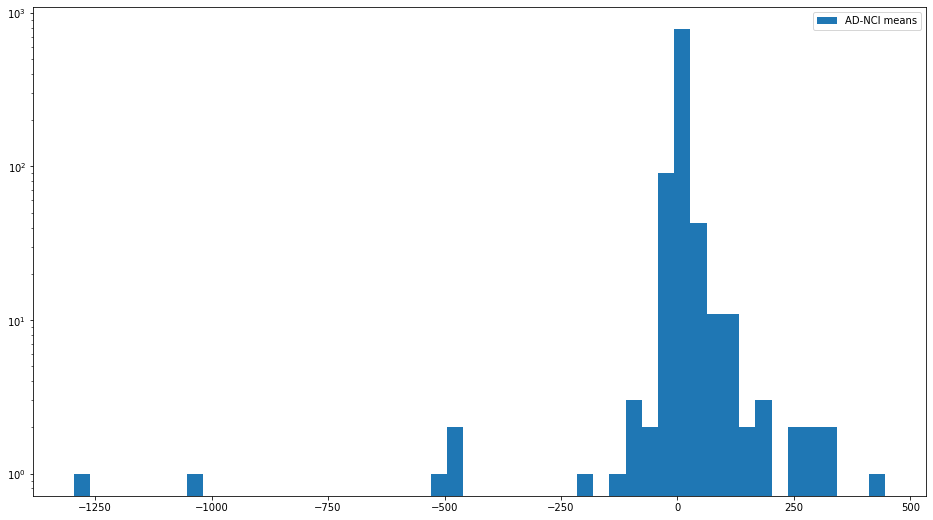

In [14]:
fig,ax = plt.subplots(figsize = (16,9))
plt.hist(df.mean()-df1.mean(),bins = 50,label = 'AD-NCI means')
plt.yscale('log')
plt.legend()

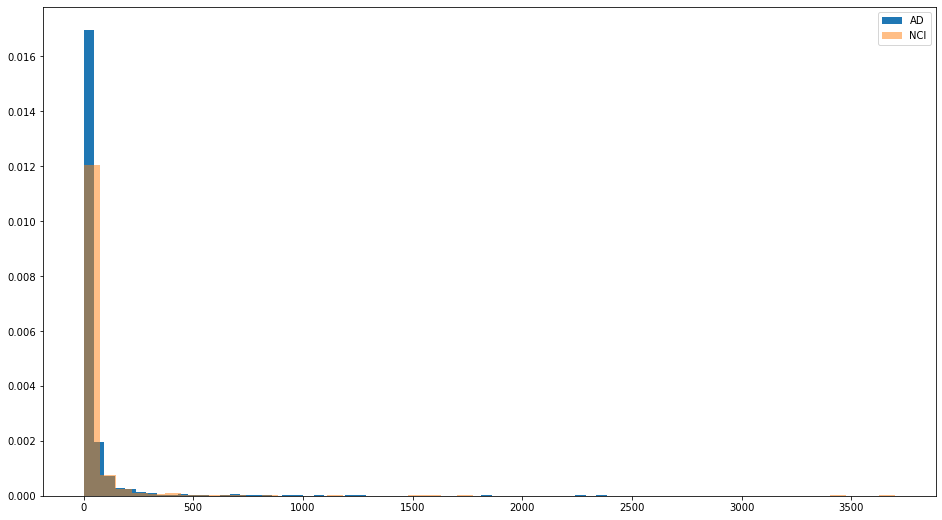

In [15]:
fig,ax = plt.subplots(figsize = (16,9))
plt.hist(df.median(),bins = 50,density = True,label='AD')
plt.hist(df1.median(),bins = 50,density = True,alpha = .5,label = 'NCI')
plt.legend()

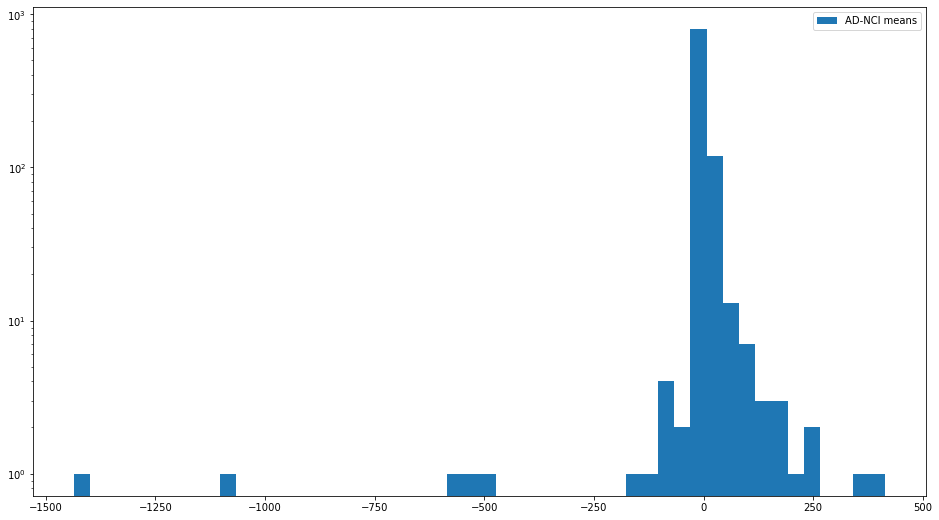

In [16]:
fig,ax = plt.subplots(figsize = (16,9))
plt.hist(df.median()-df1.median(),bins = 50,label = 'AD-NCI means')
plt.yscale('log')
plt.legend()